# Exercise: RDataFrame and collections

The same dataset used in the previous exercise (`TTree` "dataset" in file `../data/example_file.root`) contains two vector columns `vec1` and `vec2`.<br>
The elements of `vec1` are distributed as a mixture of Gaussians, plus background noise.<br>
To remove the background noise, select the elements of `vec1` for which the square of the corresponding elements in `vec2` is less than 0.1.

Where are the peaks of this mixture of Gaussians?

### Useful links

- [RDataFrame: working with collections](https://root.cern/doc/master/classROOT_1_1RDataFrame.html#collections)
- [RVec reference](https://root.cern/doc/master/classROOT_1_1VecOps_1_1RVec.html)

In [12]:
import ROOT as rt

In [13]:
treename = "dataset"
filename = "../data/example_file.root"
df0 = rt.RDataFrame(treename, filename)

df = df0.Define("vec3", "vec1[(vec2*vec2) < 0.1]")

In [14]:
df.Display().Print()

+-----+-----------+----------+-----------+-----------+-----------+
| Row | a         | b        | vec1      | vec2      | vec3      | 
+-----+-----------+----------+-----------+-----------+-----------+
| 0   | 0.977711  | 0.999742 | -3.220121 | 0.894402  |           | 
+-----+-----------+----------+-----------+-----------+-----------+
| 1   | 2.280201  | 0.484974 | -1.808350 | 0.080087  | -1.808350 | 
|     |           |          | 0.236065  | 0.479906  |           | 
|     |           |          | -3.977131 | 0.519888  |           | 
|     |           |          | -0.293643 | 0.317273  |           | 
+-----+-----------+----------+-----------+-----------+-----------+
| 2   | 0.563482  | 0.392314 |           |           |           | 
+-----+-----------+----------+-----------+-----------+-----------+
| 3   | 3.042156  | 0.333539 | 0.727539  | 0.796610  | -2.874165 | 
|     |           |          | -3.812584 | 0.331128  |           | 
|     |           |          | -2.874165 | -0.002779 

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      22.9223
NDf                       =           22
Edm                       =  1.68077e-08
NCalls                    =           60
Constant                  =      44.3367   +/-   2.34711     
Mean                      =     -1.96118   +/-   0.0524629   
Sigma                     =      1.10619   +/-   0.0395153    	 (limited)
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      28.9795
NDf                       =           22
Edm                       =  5.57217e-07
NCalls                    =           53
Constant                  =      86.6458   +/-   3.46472     
Mean                      =      3.01267   +/-   0.0314258   
Sigma                     =     0.940499   +/-   0.0223222    	 (limited)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


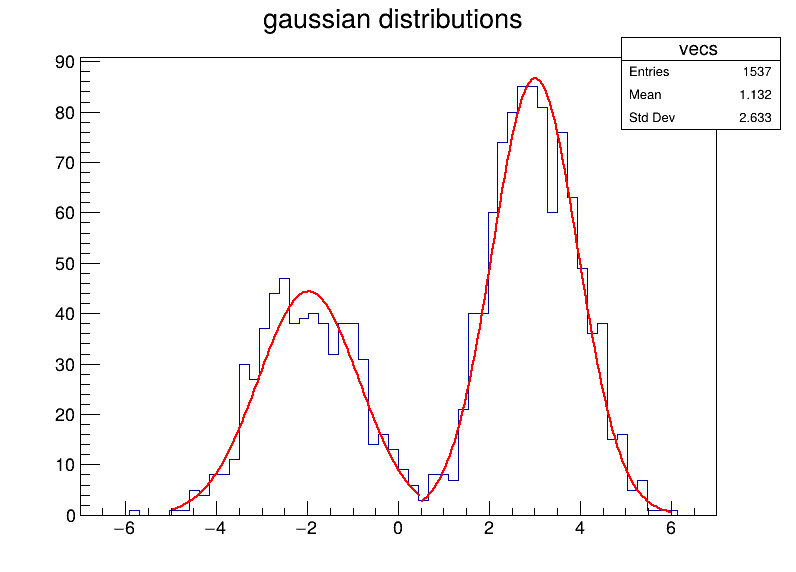

In [15]:
c = rt.TCanvas("c", "canvas", 800, 600)
h = df.Histo1D(("vecs", "gaussian distributions", 64, -7, 7),"vec3")

gaus1 = rt.TF1("Gaus1","gaus",-5, 0.5)
gaus2 = rt.TF1("Gaus2","gaus",0.5, 6)

h.Fit(gaus1, "R")
h.Fit(gaus2, "R+")

h.Draw()
c.Draw()